<h1/>Análise de Dados Qualitativos<h1/>

# Importando Bibliotecas e Carregando CSV

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
dados = pd.read_csv("dados.csv")

# Visualização do DataFrame

In [50]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<h3/>Dicionários<h3/>

In [51]:
est = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal"
}

In [335]:
sexo = {0: "Masculino", 1: "Feminino"}

In [336]:
cor = {0: 'Indígena', 
       2: 'Branca', 
       4: 'Preta', 
       6: 'Amarela', 
       8: 'Parda', 
       9: 'Sem declaração'}

# Distribuição de Frequência e Porcentagem por Sexo

In [337]:
freq = dados.Sexo.value_counts()

In [53]:
porc = dados.Sexo.value_counts(normalize = True)

In [54]:
separacao_sexo = pd.DataFrame({"Frequência": freq, "Porcentagem": porc})
separacao_sexo

,Frequência,Porcentagem
Sexo,,
0,53250,0.692998
1,23590,0.307002


In [55]:
separacao_sexo.rename(index = sexo, inplace = True)
separacao_sexo

,Frequência,Porcentagem
Sexo,,
Masculino,53250,0.692998
Feminino,23590,0.307002


<Axes: title={'center': 'Distribuição de Frequência das Pessoas Entrevistadas'}, xlabel='Sexo', ylabel='Frequência'>

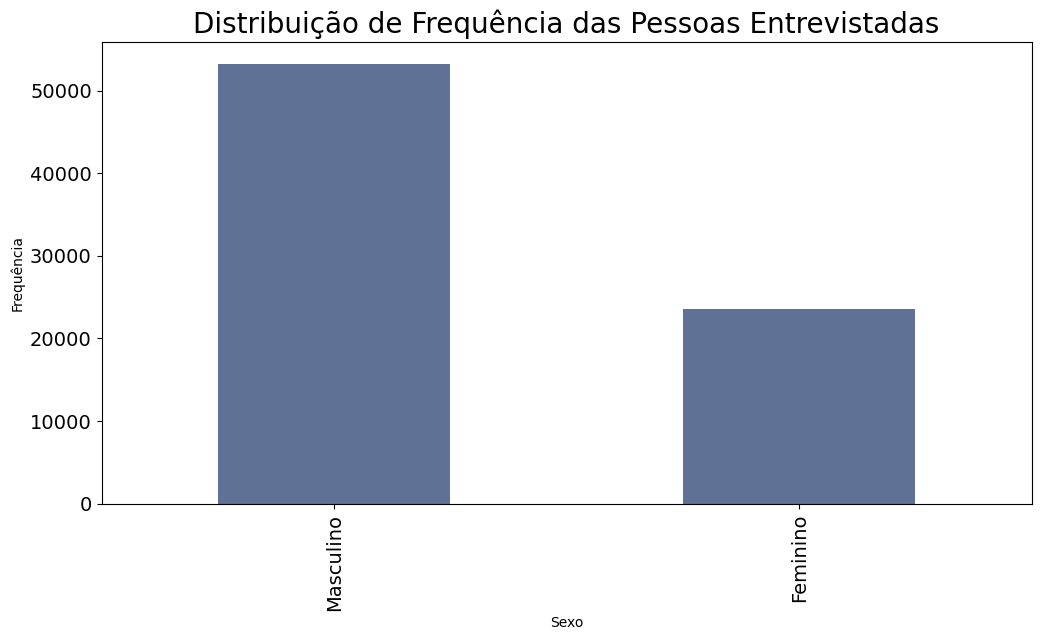

In [343]:
plt.figure(figsize = (12, 6))

plt.title("Distribuição de Frequência das Pessoas Entrevistadas", fontsize = 20)
plt.ylabel("Frequência")
separacao_sexo["Frequência"].plot(kind = 'bar', color = '#607196', fontsize = 14)

<h3/>Contagem de Pessoas por Estado<h3/>

In [57]:
frequencia = dados["UF"].value_counts().sort_values(ascending = False)
separacao_estado = frequencia.to_frame()
separacao_estado.rename(index = est, inplace = True)
separacao_estado.reset_index(inplace = True)
separacao_estado.rename(columns = {"UF": "Estados", "count": "Contagem"}, inplace = True )
separacao_estado

,Estados,Contagem
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


In [58]:
separacao_estado.set_index("Estados")

,Contagem
Estados,
São Paulo,8544
Minas Gerais,7686
Rio Grande do Sul,6322
Bahia,5717
Rio de Janeiro,5556
Pará,4449
Paraná,4356
Pernambuco,3820
Goiás,3478


In [59]:
porcentagem = dados["UF"].value_counts(normalize = True).sort_values(ascending = False) * 100
separacao_estado = porcentagem.to_frame()
separacao_estado.rename(index = est, inplace = True)
separacao_estado.reset_index(inplace = True)
separacao_estado.rename(columns = {"UF": "Estados", "proportion": "Porcentagem(%)"}, inplace = True )
separacao_estado.set_index("Estados")

,Porcentagem(%)
Estados,
São Paulo,11.119209
Minas Gerais,10.002603
Rio Grande do Sul,8.227486
Bahia,7.440135
Rio de Janeiro,7.230609
Pará,5.789953
Paraná,5.668922
Pernambuco,4.971369
Goiás,4.526288


In [60]:
pop_estados = pd.DataFrame({"Frequência": frequencia, "Porcentagem(%)": porcentagem})
pop_estados.rename(index = est, inplace = True)

In [61]:
pop_estados.index.name = "Estados"
pop_estados

,Frequência,Porcentagem(%)
Estados,,
São Paulo,8544,11.119209
Minas Gerais,7686,10.002603
Rio Grande do Sul,6322,8.227486
Bahia,5717,7.440135
Rio de Janeiro,5556,7.230609
Pará,4449,5.789953
Paraná,4356,5.668922
Pernambuco,3820,4.971369
Goiás,3478,4.526288


<Axes: title={'center': 'Distribuição por Estado das Pessoas Entrevistadas'}, xlabel='Estados'>

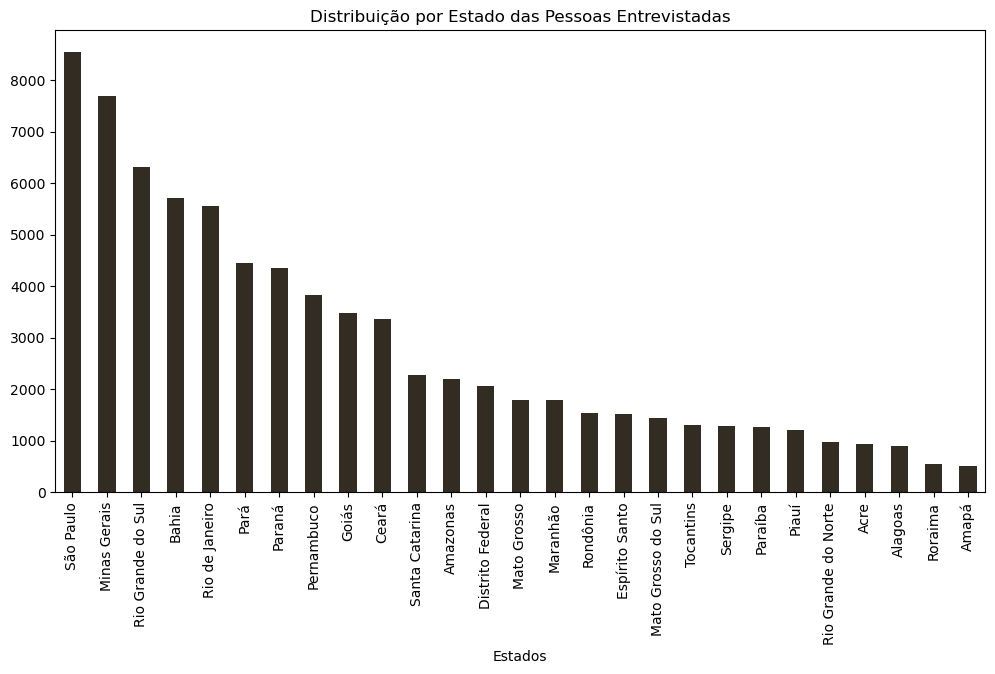

In [62]:
plt.figure(figsize = (12, 6))

plt.title("Distribuição por Estado das Pessoas Entrevistadas")

pop_estados["Frequência"].plot(kind = 'bar', color = '#332C23')

<h3/>Distribuição pelos Anos de Estudo<h3/>

In [63]:
frequencia = dados["Anos de Estudo"].value_counts().sort_index()
frequencia

Anos de Estudo
1      5849
2      1388
3      2101
4      2891
5      6729
6      4499
7      2445
8      2689
9      7980
10     1840
11     2118
12    20848
13     1836
14     1253
15     1388
16    10795
17      191
Name: count, dtype: int64

In [64]:
porcentagem = dados["Anos de Estudo"].value_counts(normalize = True).sort_index() * 100
porcentagem

Anos de Estudo
1      7.611921
2      1.806351
3      2.734253
4      3.762363
5      8.757158
6      5.855023
7      3.181936
8      3.499479
9     10.385216
10     2.394586
11     2.756377
12    27.131702
13     2.389381
14     1.630661
15     1.806351
16    14.048673
17     0.248568
Name: proportion, dtype: float64

In [65]:
dist_anos_de_estudo = pd.DataFrame({"Frequência": frequencia, "Porcentagem(%)": porcentagem})
dist_anos_de_estudo.index.name = "Anos de Estudo"
dist_anos_de_estudo

,Frequência,Porcentagem(%)
Anos de Estudo,,
1,5849,7.611921
2,1388,1.806351
3,2101,2.734253
4,2891,3.762363
5,6729,8.757158
6,4499,5.855023
7,2445,3.181936
8,2689,3.499479
9,7980,10.385216


<Axes: title={'center': 'Distribuição por Anos de Estudo das Pessoas Entrevistadas'}, xlabel='Anos de Estudo'>

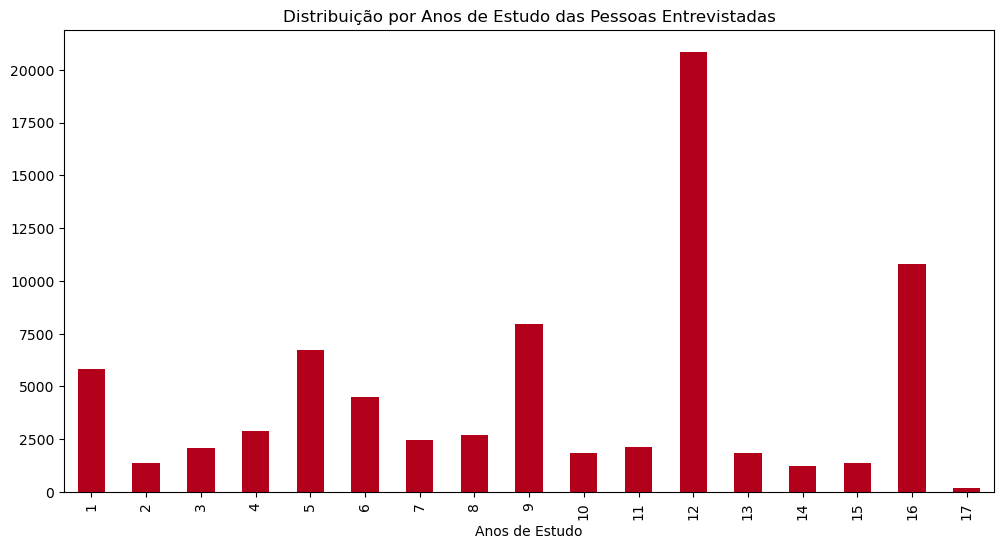

In [66]:
plt.figure(figsize = (12, 6))

plt.title("Distribuição por Anos de Estudo das Pessoas Entrevistadas")

dist_anos_de_estudo["Frequência"].plot(kind = 'bar', color = '#B3001B')

<h3/>Distribuição pela Cor<h3/>

In [67]:
frequencia = dados.Cor.value_counts()
frequencia

Cor
8    35925
2    31815
4     8391
0      357
6      352
Name: count, dtype: int64

In [68]:
porcentagem = dados.Cor.value_counts(normalize = True) * 100
porcentagem

Cor
8    46.752993
2    41.404217
4    10.920094
0     0.464602
6     0.458095
Name: proportion, dtype: float64

In [69]:
dist_cor = pd.DataFrame({"Frequência": frequencia, "Porcentagem(%)": porcentagem})
dist_cor.index = dist_cor.index.map(cor)
dist_cor.index.name = "Cor"

In [70]:
dist_cor

,Frequência,Porcentagem(%)
Cor,,
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


<Axes: title={'center': 'Distribuição pela Cor das Pessoas Entrevistadas'}, xlabel='Cor'>

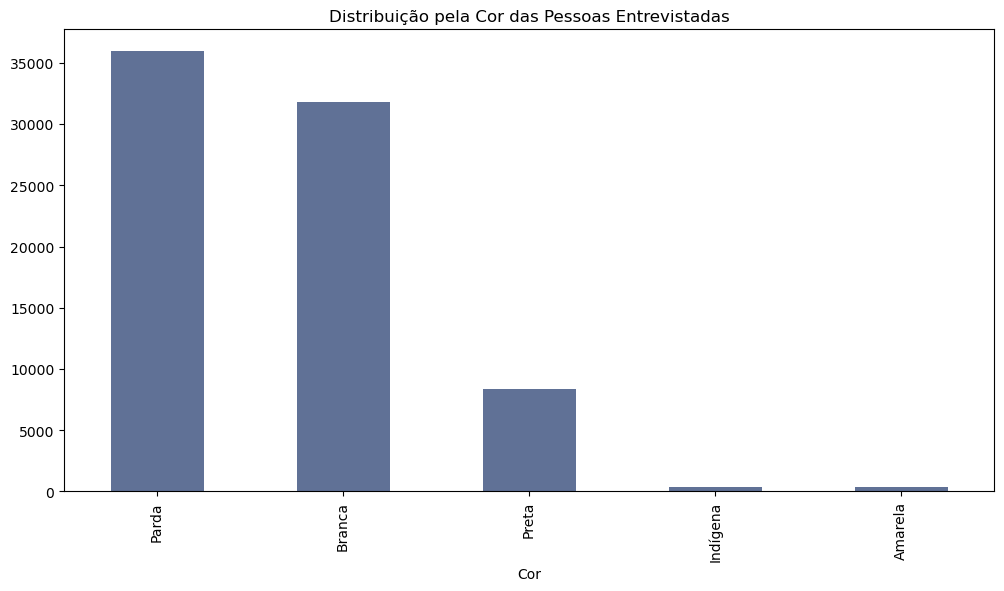

In [71]:
plt.figure(figsize = (12, 6))

plt.title("Distribuição pela Cor das Pessoas Entrevistadas")

dist_cor["Frequência"].plot(kind = 'bar', color = '#607196')

<h3/>Cruzamento de Valores<h3/>

In [72]:
cor = {0: 'Indígena', 
       2: 'Branca', 
       4: 'Preta', 
       6: 'Amarela', 
       8: 'Parda', 
       9: 'Sem declaração'}

Número de pessoas ao todo

In [329]:
frequencia = pd.crosstab(dados.Cor,
                         dados["UF"])
frequencia.rename(index = cor, inplace = True)
frequencia.rename(columns = est, inplace = True)
frequencia

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Cor,,,,,,,,,,,,,,,,,,,,,
Indígena,3,27,58,20,44,1,0,9,1,14,...,5,12,27,6,5,27,7,6,5,4
Branca,492,190,343,96,790,104,312,343,233,879,...,641,2488,5047,2966,1930,5083,639,614,1283,861
Preta,165,92,123,61,466,50,164,269,151,186,...,181,927,705,193,52,444,82,168,327,233
Amarela,9,2,6,1,14,3,4,1,0,12,...,1,19,120,53,3,9,14,8,31,12
Parda,868,626,1676,362,3135,354,826,1165,826,2268,...,683,2110,2645,1138,285,759,698,1004,1832,944


<h3/>Porcentagem de Etnias por Estado<h3/>

In [330]:
frequencia_porc = frequencia / pop_estados["Frequência"] * 100
frequencia_porc

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Cor,,,,,,,,,,,,,,,,,,,,,
Indígena,2.881537,0.442968,0.195312,2.629193,0.542242,0.416791,0.194742,0.330907,0.143761,0.503637,...,0.082576,0.000000,0.427080,0.215983,0.195185,3.703704,0.219780,0.077700,0.316011,0.000000
Branca,20.277481,27.242525,20.312500,15.548504,17.001924,26.168503,41.918208,42.422237,36.889017,19.194180,...,19.240297,37.512847,80.401772,44.780418,32.010410,17.777778,84.835165,21.989122,59.070693,23.889740
Preta,9.818570,11.406423,9.765625,5.575703,28.214098,5.537362,11.343720,11.978822,9.401955,15.053162,...,12.469034,7.194245,7.023094,16.684665,10.735198,11.296296,2.285714,10.178710,8.251404,12.557427
Amarela,0.213447,0.000000,0.585938,0.271985,0.104950,0.357249,0.584226,0.066181,0.891317,0.055960,...,0.000000,0.000000,0.142360,0.341973,0.585556,0.185185,0.131868,0.233100,1.404494,0.306279
Parda,66.808965,60.908084,69.140625,75.974615,54.136785,67.520095,45.959104,45.201853,52.673951,65.193061,...,68.208092,55.292909,12.005694,37.976962,56.473650,67.037037,12.527473,67.521368,30.957397,63.246554


In [331]:
frequencia_porc[["Acre", "Amazonas", "Alagoas", "Rio de Janeiro", "São Paulo", "Minas Gerais", "Rio Grande do Sul"]] 

,Acre,Amazonas,Alagoas,Rio de Janeiro,São Paulo,Minas Gerais,Rio Grande do Sul
Cor,,,,,,,
Indígena,2.881537,2.629193,0.442968,0.215983,0.316011,0.208171,0.427080
Branca,20.277481,15.548504,27.242525,44.780418,59.070693,40.281030,80.401772
Preta,9.818570,5.575703,11.406423,16.684665,8.251404,12.125943,7.023094
Amarela,0.213447,0.271985,0.000000,0.341973,1.404494,0.078064,0.142360
Parda,66.808965,75.974615,60.908084,37.976962,30.957397,47.306792,12.005694


<Axes: title={'center': 'Etnias do Acre'}, xlabel='Cor', ylabel='Porcentagem(%)'>

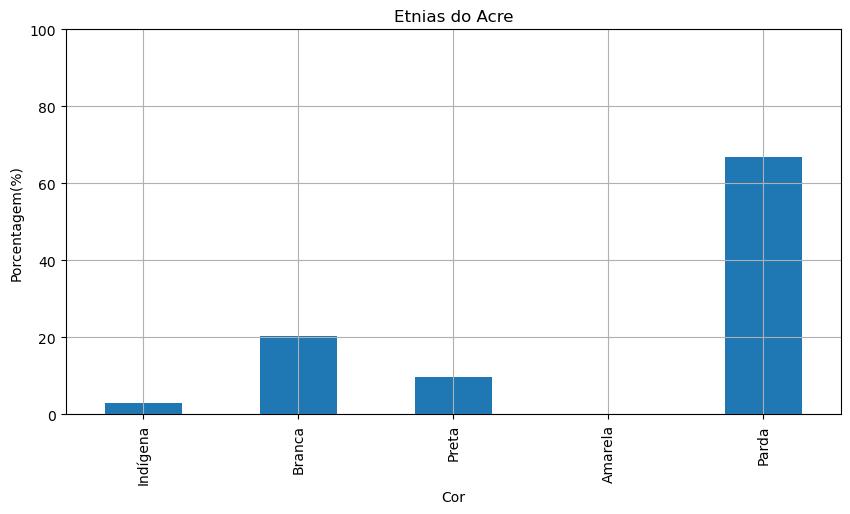

In [332]:
frequencia_porc["Acre"].plot(kind = 'bar', title = "Etnias do Acre", ylabel = "Porcentagem(%)", figsize = (10, 5), 
                             ylim = (0, 100), grid = True)

<Axes: title={'center': 'Etnias de Rio Grande do Sul'}, xlabel='Cor', ylabel='Porcentagem(%)'>

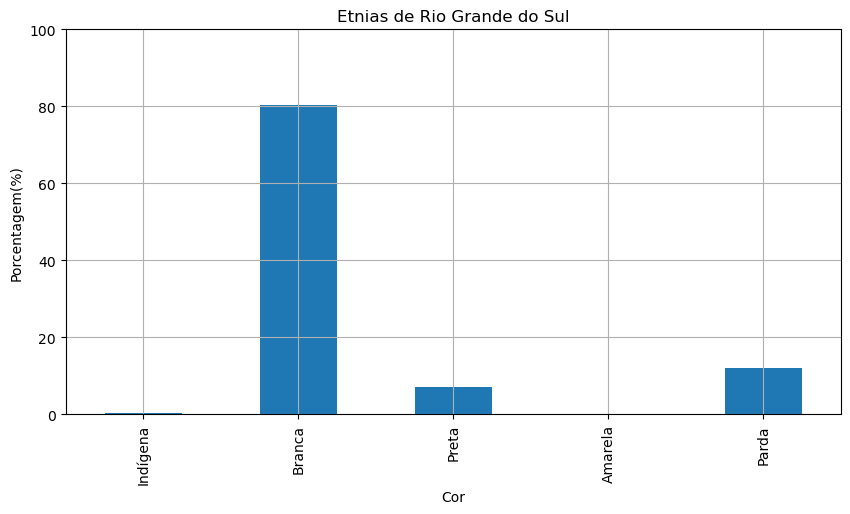

In [333]:
frequencia_porc["Rio Grande do Sul"].plot(kind = 'bar', title = "Etnias de Rio Grande do Sul",
                                          ylabel = "Porcentagem(%)", figsize = (10, 5),
                                          grid = True, ylim = (0, 100))

# Anos de Estudo x UF

In [108]:
frequencia = pd.crosstab(dados["Anos de Estudo"],
                         dados["UF"])
frequencia.rename(columns = est, inplace = True)
frequencia 

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Anos de Estudo,,,,,,,,,,,,,,,,,,,,,
1,118,189,181,53,393,30,123,322,243,416,...,94,217,318,223,78,176,77,135,207,73
2,41,18,54,10,108,8,41,86,44,104,...,24,44,60,30,15,72,36,28,55,12
3,55,17,72,10,170,10,44,95,74,113,...,38,93,102,89,32,124,50,48,91,12
4,73,34,76,17,273,17,72,76,79,145,...,44,136,208,137,50,215,45,63,128,32
5,174,66,138,29,356,37,88,147,154,203,...,186,334,684,453,279,469,142,146,292,92
6,105,36,148,21,291,21,89,100,61,184,...,93,281,392,227,91,604,89,115,234,73
7,55,10,73,19,161,16,39,49,34,97,...,39,157,237,123,44,269,62,54,149,41
8,53,25,83,19,155,14,29,62,32,114,...,56,181,251,124,67,225,62,53,166,55
9,173,109,207,44,502,58,129,162,80,401,...,164,747,925,465,340,720,146,222,386,132


<h3/>Anos de Estudo x UF em porcentagem por estado<h3/>

In [325]:
frequencia_porc = frequencia/ pop_estados["Frequência"] * 100
frequencia_porc = frequencia_porc.round(2)
frequencia_porc

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Anos de Estudo,,,,,,,,,,,,,,,,,,,,,
1,20.17,14.51,5.86,8.20,11.96,12.38,3.55,6.22,5.95,18.02,...,20.07,10.89,2.78,3.91,7.68,9.81,3.43,16.63,3.72,9.42
2,1.92,2.88,1.56,2.45,2.40,3.10,0.58,1.59,1.58,4.81,...,3.63,4.01,1.14,0.79,2.67,1.85,0.66,4.66,0.70,3.14
3,1.81,6.20,1.95,3.26,3.31,3.36,0.58,2.51,2.62,5.32,...,6.11,3.08,1.96,1.67,3.58,1.85,1.41,5.98,1.19,3.37
4,3.63,5.09,3.32,3.45,4.36,4.32,1.56,2.91,3.68,4.25,...,6.52,4.21,3.40,2.45,4.75,3.15,2.20,6.60,2.43,5.51
5,7.04,9.19,7.23,6.26,7.91,6.04,4.48,12.31,8.40,8.23,...,12.72,7.19,7.42,6.01,11.32,5.37,12.26,9.09,8.01,6.74
6,3.84,7.20,4.10,6.71,6.23,5.48,3.55,6.15,6.73,5.60,...,5.04,5.65,9.55,5.06,6.83,3.89,4.00,5.36,4.59,6.81
7,1.07,3.21,3.12,3.31,3.39,2.89,2.00,2.58,4.28,2.74,...,2.81,3.29,4.25,2.83,3.58,3.52,1.93,4.58,2.77,2.99
8,2.67,6.42,2.73,3.76,3.78,3.39,2.68,3.71,4.77,3.47,...,2.64,3.91,3.56,3.26,3.45,3.52,2.95,3.96,2.94,2.22
9,11.63,7.97,11.33,9.38,7.05,11.94,6.43,10.85,11.10,9.07,...,6.61,8.02,11.39,13.44,11.26,8.15,14.95,7.23,10.83,9.88


In [326]:
frequencia_porc[["Acre", "Amazonas", "Alagoas", "Rio de Janeiro", "São Paulo", "Minas Gerais", "Rio Grande do Sul"]]

,Acre,Amazonas,Alagoas,Rio de Janeiro,São Paulo,Minas Gerais,Rio Grande do Sul
Anos de Estudo,,,,,,,
1,20.17,8.20,14.51,3.91,3.72,6.02,2.78
2,1.92,2.45,2.88,0.79,0.70,1.30,1.14
3,1.81,3.26,6.20,1.67,1.19,3.10,1.96
4,3.63,3.45,5.09,2.45,2.43,4.53,3.40
5,7.04,6.26,9.19,6.01,8.01,14.88,7.42
6,3.84,6.71,7.20,5.06,4.59,5.09,9.55
7,1.07,3.31,3.21,2.83,2.77,3.34,4.25
8,2.67,3.76,6.42,3.26,2.94,4.27,3.56
9,11.63,9.38,7.97,13.44,10.83,10.16,11.39


<h3/>Exibição de Gráficos de Anos de Estudo<h3/>

<Axes: title={'center': 'Gráfico de Linha dos Anos de Estudo no Piauí'}, xlabel='Anos de Estudo', ylabel='Porcentagem(%)'>

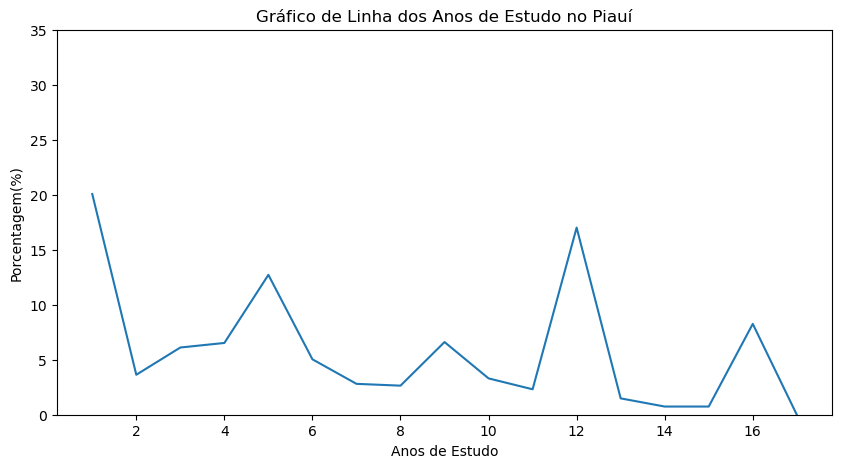

In [115]:
plt.figure(figsize = (10, 5))

frequencia_porc["Piauí"].plot(ylabel = "Porcentagem(%)", title = "Gráfico de Linha dos Anos de Estudo no Piauí",
                              ylim = (0, 35))

<Axes: title={'center': 'Gráfico de Linha dos Anos de Estudo em São Paulo'}, xlabel='Anos de Estudo', ylabel='Porcentagem(%)'>

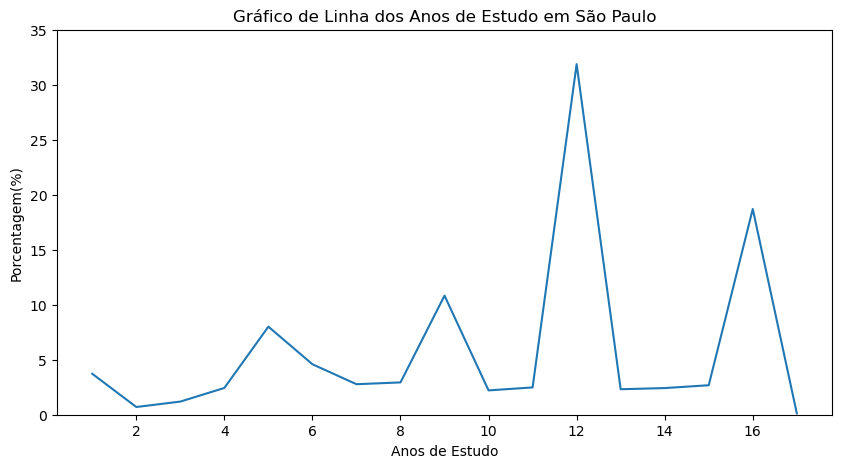

In [114]:
plt.figure(figsize = (10, 5))

frequencia_porc['São Paulo'].plot(ylabel = "Porcentagem(%)", title = "Gráfico de Linha dos Anos de Estudo em São Paulo",
                                  ylim = (0, 35))

<h1/>Cor x Anos de Estudo<h1/>

In [304]:
cor_ano = pd.crosstab(dados["Cor"],
                      dados["Anos de Estudo"])
cor_ano.rename(index = cor, inplace = True)

cor_ano

Anos de Estudo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cor,,,,,,,,,,,,,,,,,
Indígena,49,10,12,17,22,23,12,16,45,16,12,82,7,5,6,20,3
Branca,1420,364,617,929,2683,1600,860,940,3102,558,779,8838,869,663,773,6758,62
Preta,801,174,261,361,694,523,295,315,900,237,276,2423,189,114,116,691,21
Amarela,9,2,1,3,21,7,6,1,26,2,8,88,9,7,10,152,0
Parda,3570,838,1210,1581,3309,2346,1272,1417,3907,1027,1043,9417,762,464,483,3174,105


In [305]:
for index in cor_ano.index:
    cor_ano.loc[index] = cor_ano.loc[index] / dist_cor["Frequência"][index]
    
cor_ano = cor_ano * 100
cor_ano.round(2)

Anos de Estudo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cor,,,,,,,,,,,,,,,,,
Indígena,13.73,2.80,3.36,4.76,6.16,6.44,3.36,4.48,12.61,4.48,3.36,22.97,1.96,1.40,1.68,5.60,0.84
Branca,4.46,1.14,1.94,2.92,8.43,5.03,2.70,2.95,9.75,1.75,2.45,27.78,2.73,2.08,2.43,21.24,0.19
Preta,9.55,2.07,3.11,4.30,8.27,6.23,3.52,3.75,10.73,2.82,3.29,28.88,2.25,1.36,1.38,8.24,0.25
Amarela,2.56,0.57,0.28,0.85,5.97,1.99,1.70,0.28,7.39,0.57,2.27,25.00,2.56,1.99,2.84,43.18,0.00
Parda,9.94,2.33,3.37,4.40,9.21,6.53,3.54,3.94,10.88,2.86,2.90,26.21,2.12,1.29,1.34,8.84,0.29


<Axes: title={'center': 'Anos de Estudo de Pardos'}>

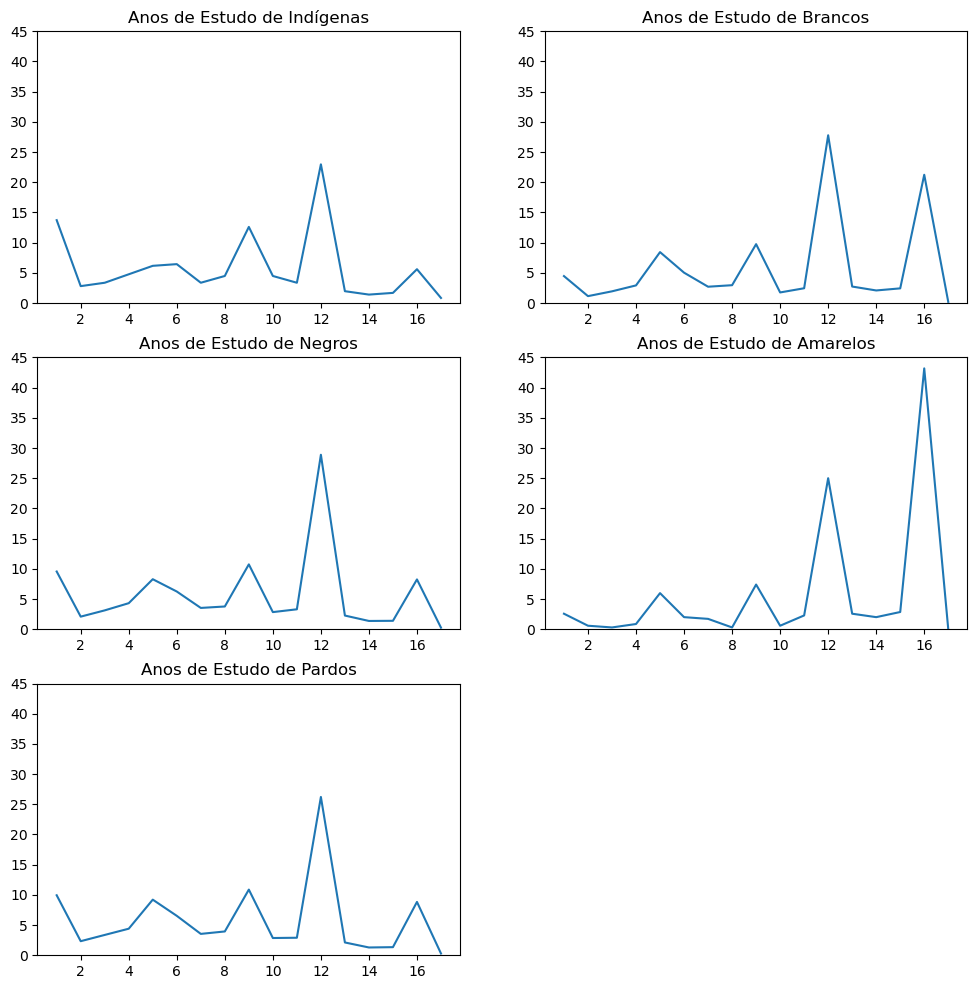

In [322]:
fig, axes = plt.subplots(3, 2, figsize = (12, 12))
fig.delaxes(axes[2,1])

cor_ano.loc["Indígena"].plot(ax = axes[0,0], ylim = [0, 45], title = "Anos de Estudo de Indígenas", xlabel = "")
cor_ano.loc["Branca"].plot(ax = axes[0,1], ylim = [0, 45], title = "Anos de Estudo de Brancos", xlabel = "")
cor_ano.loc["Preta"].plot(ax = axes[1,0], ylim = [0, 45], title = "Anos de Estudo de Negros", xlabel = "")
cor_ano.loc["Amarela"].plot(ax = axes[1,1], ylim = [0, 45], title = "Anos de Estudo de Amarelos", xlabel = "")
cor_ano.loc["Parda"].plot(ax = axes[2,0], ylim = [0, 45], title = "Anos de Estudo de Pardos", xlabel = "")